## Fig. 2 in main text


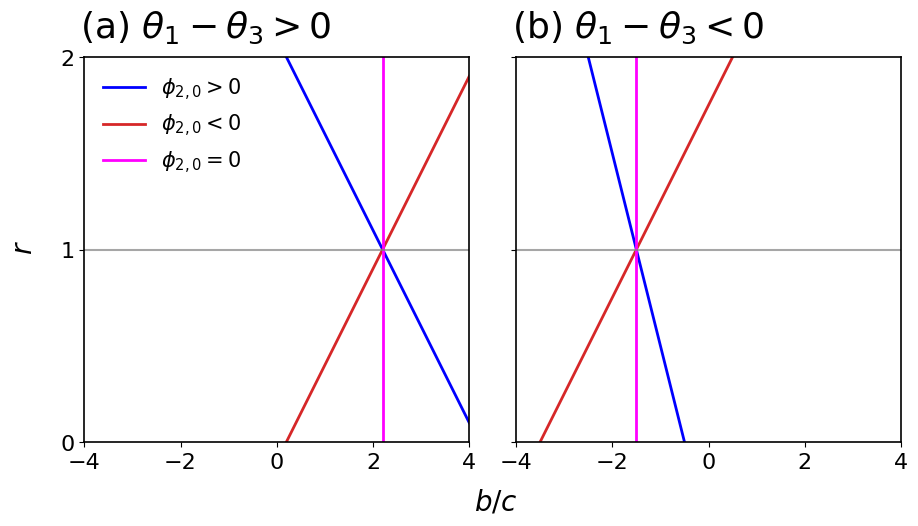

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Config - changed range to -4 to 4
bc_min, bc_max = -4, 4
bc = np.linspace(bc_min, bc_max, 500)
phi_pos = 2.0
phi_neg = -2.0
phi_pos_right = 1.0  # NEW: Adjusted for panel (b) to avoid positive (b/c)*
bc_phi0_left  = 2.2   # Shifted right from 1.5
bc_phi0_right = -1.5
# Helper
def line_through(bc0, phi, x_grid):
    A = bc0 + phi
    return (A - x_grid) / phi
# Left panel lines
r_left_pos  = line_through(bc_phi0_left,  phi_pos, bc)
r_left_neg  = line_through(bc_phi0_left,  phi_neg, bc)
# Right panel lines - blue line uses different phi to avoid positive intercept
r_right_pos = line_through(bc_phi0_right, phi_pos_right, bc)  # Changed phi
r_right_neg = line_through(bc_phi0_right, phi_neg, bc)
# Figure dimensions
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
# ------------ Styling helper ---------------
def style_axes(ax):
    ax.set_xlim(bc_min, bc_max)
    ax.set_ylim(0, 2)
    # Ticks: y only 0,1,2
    ax.set_yticks([0, 1, 2])
    # X-ticks: every 2
    ax.set_xticks([-4, -2, 0, 2, 4])
    # Four-sided box
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
    # DOUBLED tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_box_aspect(1)
# ===== LEFT =====
ax = axes[0]
# Changed teal to blue, kept red, increased linewidth
ax.plot(bc, r_left_pos, label=r"$\phi_{2,0}>0$",  color="blue", linewidth=2)
ax.plot(bc, r_left_neg, label=r"$\phi_{2,0}<0$",  color="#d62728", linewidth=2)
# Changed black dashed to magenta solid
ax.axvline(bc_phi0_left,  linestyle="-", color="magenta", linewidth=2, label=r"$\phi_{2,0}=0$")
# Changed dotted to solid gray line
ax.axhline(1, linestyle="-", color="gray", linewidth=1.5, alpha=0.7)
style_axes(ax)
# Legend with 1.5x larger font (10 -> 15)
ax.legend(frameon=False, loc="upper left", fontsize=15)
# NEW: Panel label above the plot box
# Font size: 1.3 × 20 = 26
ax.text(-0.01, 1.03, r"(a) $\theta_1 - \theta_3 > 0$", 
        transform=ax.transAxes, fontsize=26, va='bottom', ha='left')
# ===== RIGHT =====
ax = axes[1]
# Same color scheme - but using adjusted blue line
ax.plot(bc, r_right_pos, color="blue", linewidth=2)
ax.plot(bc, r_right_neg, color="#d62728", linewidth=2)
# Changed black dashed to magenta solid
ax.axvline(bc_phi0_right, linestyle="-", color="magenta", linewidth=2)
# Changed dotted to solid gray line
ax.axhline(1, linestyle="-", color="gray", linewidth=1.5, alpha=0.7)
style_axes(ax)
# NEW: Panel label above the plot box
ax.text(-0.01, 1.03, r"(b) $\theta_1 - \theta_3 < 0$", 
        transform=ax.transAxes, fontsize=26, va='bottom', ha='left')
# Reduced horizontal space between subplots - HALVED from 0.3 to 0.15
plt.subplots_adjust(wspace=-0.25)
# --------- Common X / Y labels -------------
# X label: changed from fraction to inline b/c
# Font size same as r (20)
fig.text(0.515, -0.01, r"$b/c$", ha="center", va="center", fontsize=20)
# Y label: moved closer to plot (0.055 → 0.08)
fig.text(0.152, 0.5, r"$r$", ha="center", va="center", rotation="vertical", fontsize=20)
plt.savefig("schematic.png", dpi=300, bbox_inches='tight')
plt.savefig("schematic.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Networks

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.Layer 2 hub node: 8 (farthest from screen)



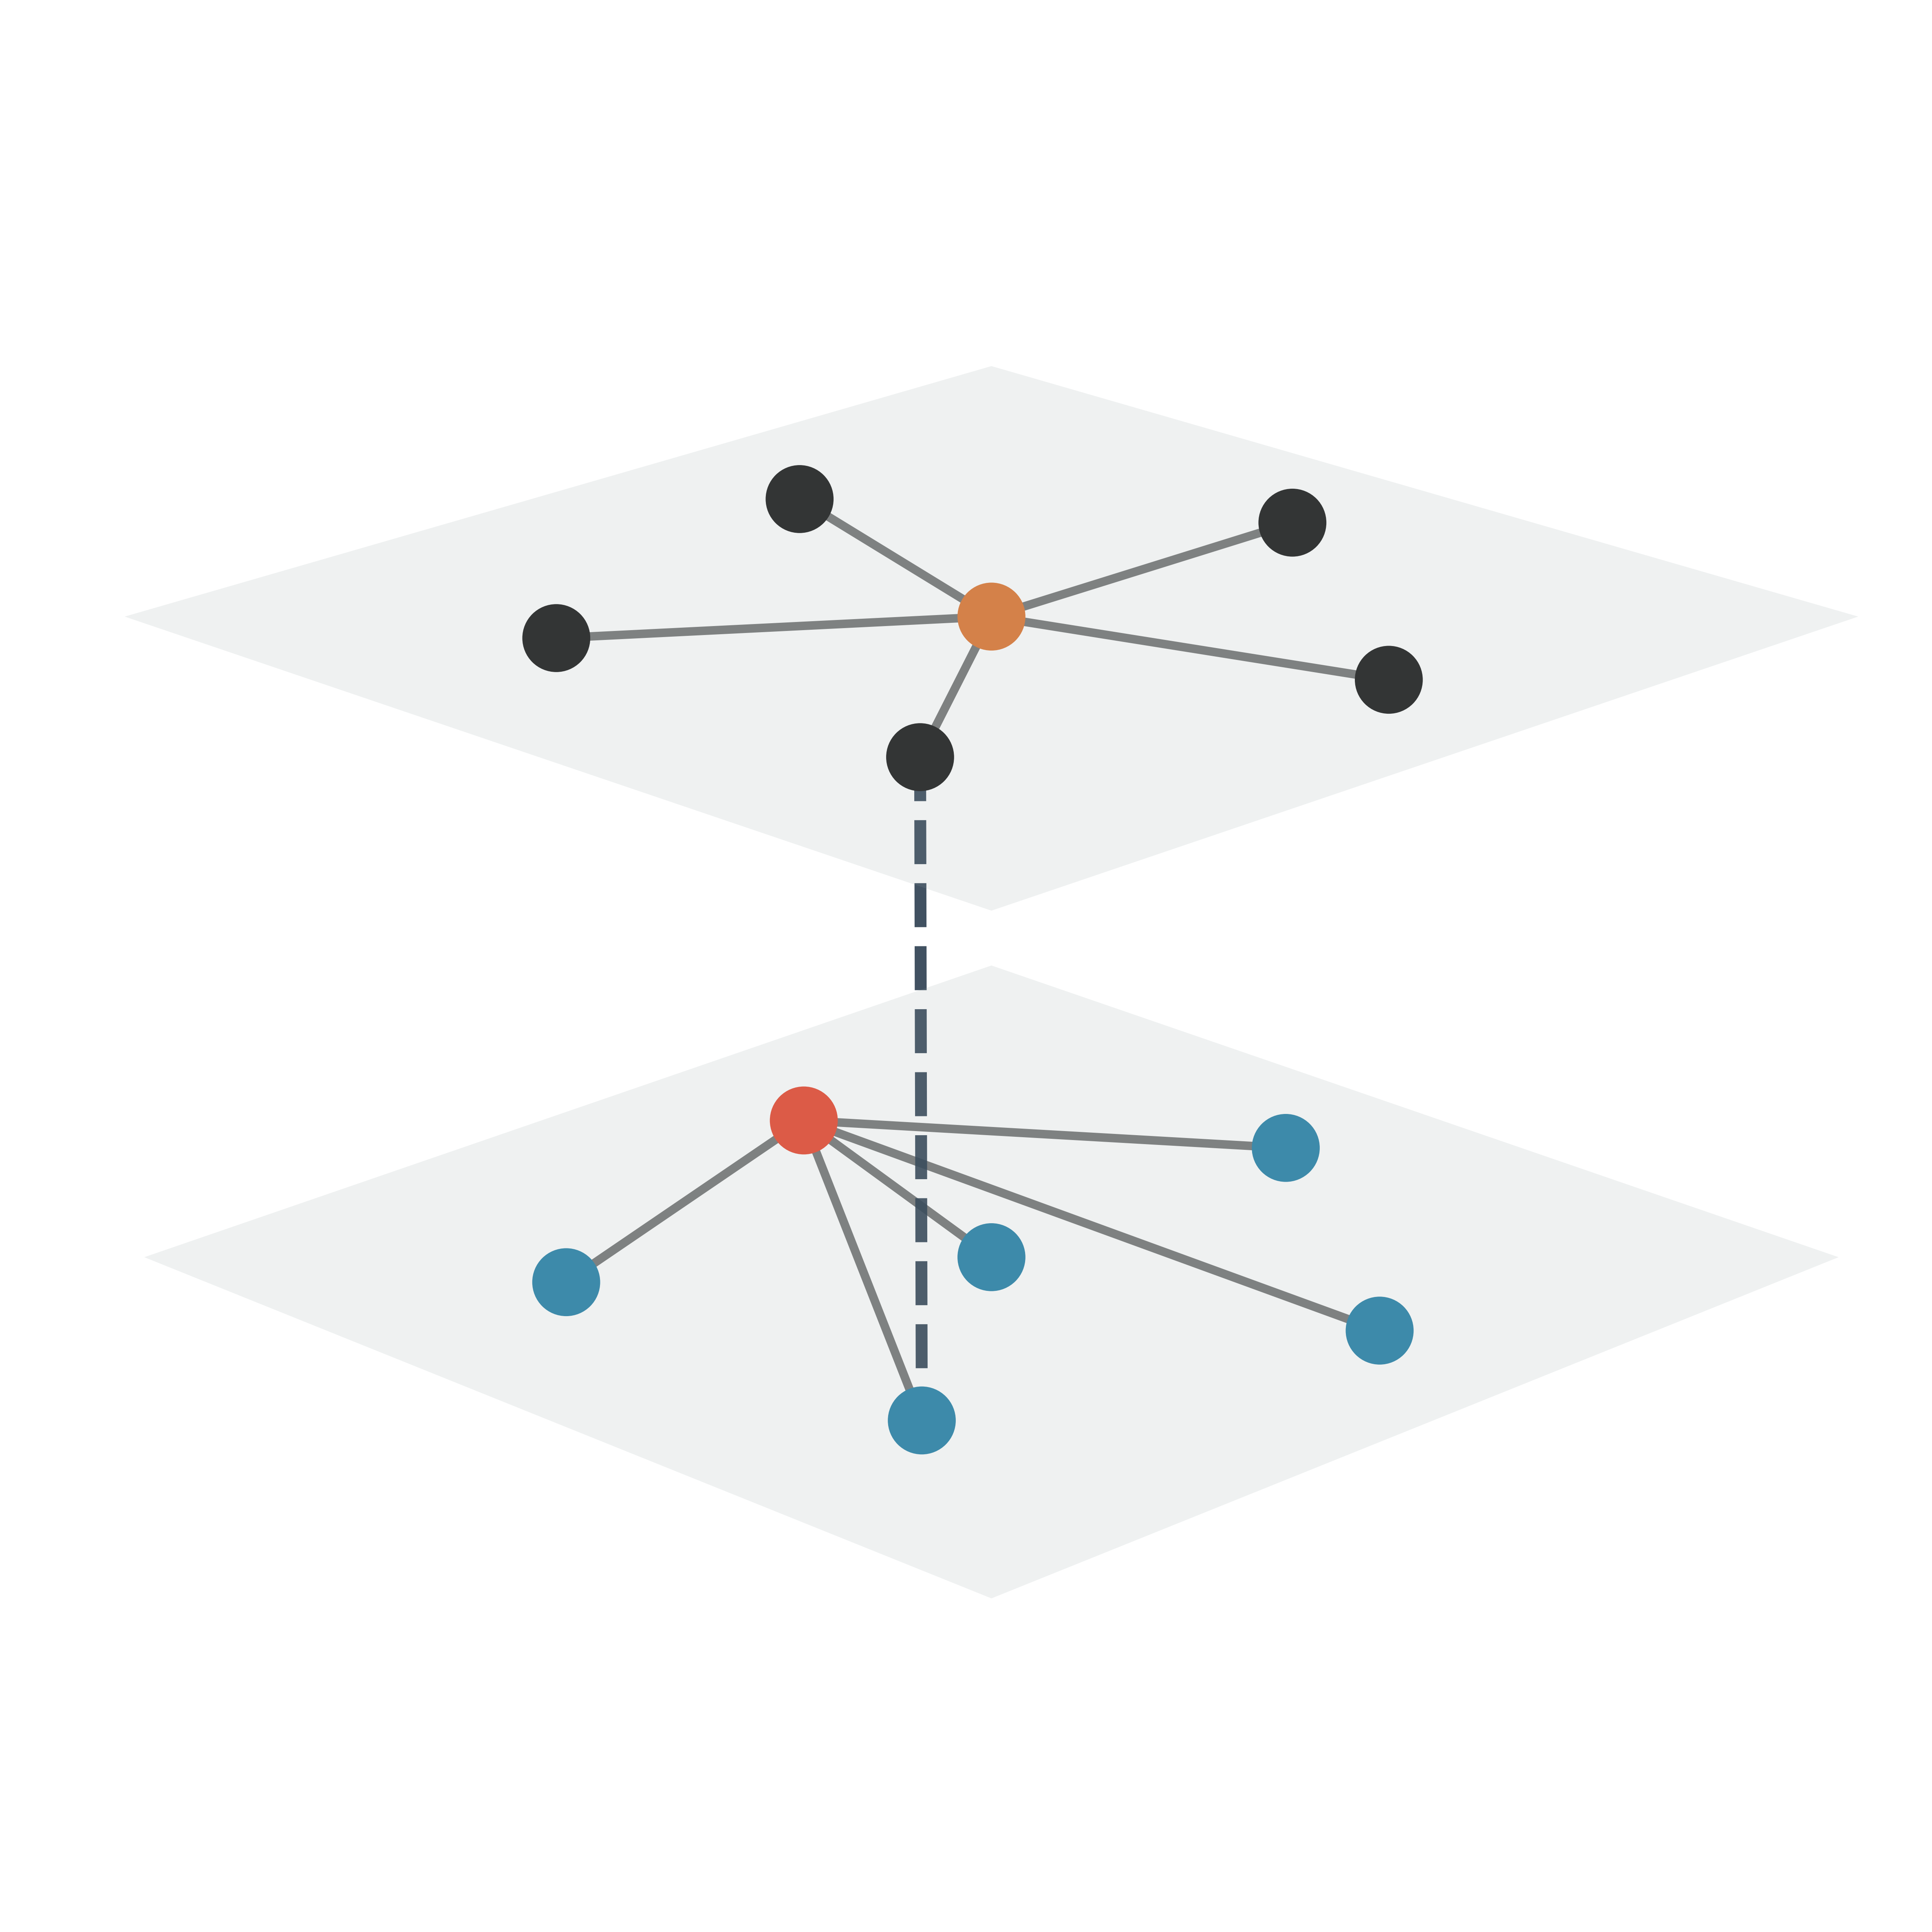

✓ Saved: star_layer_network_3d.png


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ===== STYLING PARAMETERS (matching ring network) =====
NODE_SIZE = 400
NODE_COLOR_ORANGE = '#E07B39'    # Cooperator (layer 1) - highlighted
NODE_COLOR_BLACK = '#222222'     # Default (layer 1)
NODE_COLOR_BLUE = '#2E86AB'      # Resident (layer 2)
NODE_COLOR_RED = '#E94F37'       # Mutant (layer 2) - highlighted
EDGE_COLOR = '#5A5A5A'
EDGE_WIDTH = 2.5
LAYER_ALPHA = 0.15
DASHED_LINE_WIDTH = 3.5
DASHED_LINE_COLOR = '#2C3E50'

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.facecolor'] = 'white'

def add_layer_rectangle(ax, z, extent=6):
    """Add semi-transparent rectangle without contour lines"""
    corners = [(-extent, -extent, z), (extent, -extent, z),
               (extent, extent, z), (-extent, extent, z)]
    poly = Poly3DCollection([corners], facecolors='#95A5A6', 
                           edgecolors='none', linewidths=0, alpha=LAYER_ALPHA)
    ax.add_collection3d(poly)

# ===== CREATE STAR GRAPH MULTILAYER NETWORK =====
n_peripheral = 5
n_nodes_per_layer = n_peripheral + 1  # 6 nodes per layer

# Create positions
pos = {}
radius = 5
vertical_offset = 15

# Layer 1 (top): Node 6 is center/hub, nodes 1-5 are peripheral
pos[6] = (0, 0, vertical_offset)
for i in range(1, 6):
    angle = np.pi + 2 * np.pi * (i - 1) / n_peripheral
    pos[i] = (radius * np.cos(angle), radius * np.sin(angle), vertical_offset)

# Layer 2 (bottom): Same positions, nodes 7-11 peripheral, node 12 at center position
pos[12] = (0, 0, -vertical_offset)
for i in range(1, 6):
    angle = np.pi + 2 * np.pi * (i - 1) / n_peripheral
    pos[6 + i] = (radius * np.cos(angle), radius * np.sin(angle), -vertical_offset)

# Find the node farthest from the screen in Layer 2
azim_rad = np.radians(45)
layer2_nodes = [7, 8, 9, 10, 11, 12]
depths = {}
for node in layer2_nodes:
    x, y, z = pos[node]
    depth = x * np.cos(azim_rad) + y * np.sin(azim_rad)
    depths[node] = depth

hub_layer2 = min(depths, key=depths.get)
print(f"Layer 2 hub node: {hub_layer2} (farthest from screen)")

# Create the graph
G = nx.Graph()

# Layer 1 edges: star with node 6 as hub
for i in range(1, 6):
    G.add_edge(6, i)

# Layer 2 edges: star with hub_layer2 as hub
for node in layer2_nodes:
    if node != hub_layer2:
        G.add_edge(hub_layer2, node)

# ===== PLOTTING =====
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

# Add layer rectangles
add_layer_rectangle(ax, vertical_offset, extent=7)
add_layer_rectangle(ax, -vertical_offset, extent=7)

# Draw edges first (behind nodes)
for u, v in G.edges():
    x1, y1, z1 = pos[u]
    x2, y2, z2 = pos[v]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 
            color=EDGE_COLOR, linewidth=EDGE_WIDTH, alpha=0.8, 
            solid_capstyle='butt', antialiased=True)

# Draw nodes with layer-specific coloring (NO white edge)
layer1_nodes = [1, 2, 3, 4, 5, 6]
layer1_hub = 6

for node in pos:
    x, y, z = pos[node]
    
    if node in layer1_nodes:
        if node == layer1_hub:
            color = NODE_COLOR_ORANGE
        else:
            color = NODE_COLOR_BLACK
    else:
        if node == hub_layer2:
            color = NODE_COLOR_RED
        else:
            color = NODE_COLOR_BLUE
    
    ax.scatter(x, y, z, color=color, s=NODE_SIZE, 
               edgecolors='none', linewidths=0, alpha=1.0,  # No white edge
               antialiased=True, zorder=10)

# Draw dashed inter-layer connection line
dashed_node_layer1 = 4
dashed_node_layer2 = 10

x0, y0, z0 = pos[dashed_node_layer1]
x1, y1, z1 = pos[dashed_node_layer2]
ax.plot([x0, x1], [y0, y1], [z0, z1], 
        color=DASHED_LINE_COLOR, linestyle='--', 
        linewidth=DASHED_LINE_WIDTH, alpha=0.9)

# Set viewing angle
ax.view_init(elev=20, azim=45)

# Remove axes
ax._axis3don = False
ax.set_facecolor('white')

# Set equal aspect ratio
max_range = radius + 2
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-vertical_offset - 5, vertical_offset + 5])

plt.savefig("star_layer_network_3d.png", dpi=600, 
            bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()
plt.close()



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import art3d

# ===== COLOR SCHEME =====
BLUE = '#2E86AB'      # Resident (layer 2)
RED = '#E94F37'       # Mutant (layer 2)
ORANGE = '#E07B39'    # Cooperator (layer 1)
BLACK = '#222222'     # Defector (layer 1)

# Node sizes and styling
NODE_SIZE = 400
EDGE_COLOR = '#5A5A5A'
EDGE_WIDTH = 2.5
LAYER_ALPHA = 0.15
DASHED_LINE_WIDTH = 3.5
DASHED_LINE_COLOR = '#2C3E50'

# Set global matplotlib parameters
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.facecolor'] = 'white'

def add_layer_rectangle_patch(ax, z, radius):
    """Add semi-transparent rectangle using Rectangle patch"""
    rect_width = 2 * radius
    rect_height = 2 * radius
    rect = plt.Rectangle(
        (-rect_width / 2, -rect_height / 2),
        rect_width, rect_height,
        color='#95A5A6', alpha=LAYER_ALPHA, edgecolor='none'
    )
    ax.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=z, zdir="z")

def draw_edge(ax, p1, p2, lw=EDGE_WIDTH, ls='-'):
    """Draw an edge with rounded caps so it visually meets the node."""
    ax.plot([p1[0], p2[0]],
            [p1[1], p2[1]],
            [p1[2], p2[2]],
            color=EDGE_COLOR,
            linewidth=lw,
            linestyle=ls,
            alpha=0.8,
            antialiased=True,
            solid_capstyle='round',
            solid_joinstyle='round')

def draw_node(ax, p, color):
    """Draw node with NO outline (removes the white gap you were seeing)."""
    ax.scatter(p[0], p[1], p[2],
               color=color,
               s=NODE_SIZE,
               edgecolors='none',   # <-- key: removes white halo
               linewidths=0,
               alpha=1.0,
               antialiased=True,
               depthshade=False,
               zorder=10)

# ===== FIGURE 1: RING NETWORK =====
print("Creating Figure 1: Ring Network...")

G1 = nx.cycle_graph(10)
G2 = nx.cycle_graph(10)

pos = {}
radius = 5
vertical_offset = 10

for i in range(10):
    angle = 2 * np.pi * i / 10
    pos[i] = (radius * np.cos(angle), radius * np.sin(angle), vertical_offset)
    pos[i + 10] = (radius * np.cos(angle), radius * np.sin(angle), -vertical_offset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

add_layer_rectangle_patch(ax, vertical_offset, radius)
add_layer_rectangle_patch(ax, -vertical_offset, radius)

# Draw edges (first)
for n1, n2 in G1.edges():
    draw_edge(ax, pos[n1], pos[n2])

for n1, n2 in G2.edges():
    draw_edge(ax, pos[n1 + 10], pos[n2 + 10])

# Draw nodes (on top)
for node in range(10):
    draw_node(ax, pos[node], BLACK if node == 0 else ORANGE)

for node in range(10, 20):
    draw_node(ax, pos[node], RED if node == 10 else BLUE)

# Dashed coupling line
x0, y0, z0 = pos[0]
x1, y1, z1 = pos[10]
ax.plot([x0, x1], [y0, y1], [z0, z1],
        color=DASHED_LINE_COLOR,
        linestyle='--',
        linewidth=DASHED_LINE_WIDTH,
        alpha=0.9,
        solid_capstyle='round',
        zorder=5)

ax._axis3don = False
ax.set_facecolor('white')

plt.savefig("ring_layer_network_3d.png", dpi=600,
            bbox_inches='tight', facecolor='white', edgecolor='none')
plt.close()
print("✓ Saved: ring_layer_network_3d.png")

# ===== FIGURE 2: HETEROGENEOUS NETWORK =====
print("Creating Figure 2: Heterogeneous Network...")

edge_seq = [
    (1, 2, 1, 1), (2, 1, 1, 1), (2, 3, 1, 1), (3, 2, 1, 1),
    (3, 4, 1, 1), (4, 3, 1, 1), (4, 5, 1, 1), (5, 4, 1, 1),
    (5, 1, 1, 1), (1, 5, 1, 1), (6, 5, 1, 1), (5, 6, 1, 1),
    (6, 4, 1, 1), (4, 6, 1, 1), (6, 3, 1, 1), (3, 6, 1, 1),
    (6, 2, 1, 1), (2, 6, 1, 1), (6, 1, 1, 1), (1, 6, 1, 1),
    (1, 2, 1, 2), (2, 1, 1, 2), (2, 6, 1, 2), (6, 2, 1, 2),
    (2, 3, 1, 2), (3, 2, 1, 2), (2, 4, 1, 2), (4, 2, 1, 2),
    (3, 6, 1, 2), (6, 3, 1, 2), (3, 5, 1, 2), (5, 3, 1, 2),
    (3, 4, 1, 2), (4, 3, 1, 2)
]

G = nx.Graph()
for u, v, w, layer in edge_seq:
    if layer == 1:
        G.add_edge(u, v, layer=layer)
    else:
        G.add_edge(u + 6, v + 6, layer=layer)

pos = {}
radius = 5
angle_offset = np.pi / 12  # Rotate bottom layer to avoid overlap

# Top layer nodes 1..6
for i in range(1, 7):
    angle = 2 * (i - 1) * np.pi / 6
    pos[i] = (radius * np.cos(angle), radius * np.sin(angle), 10)

# Bottom layer nodes 7..12 (rotated)
for i in range(1, 7):
    angle = 2 * (i - 1) * np.pi / 6 + angle_offset
    pos[i + 6] = (radius * np.cos(angle), radius * np.sin(angle), -10)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

rect_size = 12
top_corners = [(-rect_size/2, -rect_size/2, 10), (rect_size/2, -rect_size/2, 10),
               (rect_size/2, rect_size/2, 10), (-rect_size/2, rect_size/2, 10)]
bot_corners = [(-rect_size/2, -rect_size/2, -10), (rect_size/2, -rect_size/2, -10),
               (rect_size/2, rect_size/2, -10), (-rect_size/2, rect_size/2, -10)]

ax.add_collection3d(Poly3DCollection([top_corners], color='#95A5A6', alpha=LAYER_ALPHA, edgecolor='none'))
ax.add_collection3d(Poly3DCollection([bot_corners], color='#95A5A6', alpha=LAYER_ALPHA, edgecolor='none'))

# Draw edges (first)
for u, v, d in G.edges(data=True):
    draw_edge(ax, pos[u], pos[v])

# Draw nodes (on top)
for i in range(1, 7):
    draw_node(ax, pos[i], BLACK if i == 6 else ORANGE)

for i in range(1, 7):
    nid = i + 6
    draw_node(ax, pos[nid], RED if nid == 12 else BLUE)

# Coupling dashed line between special nodes
ax.plot([pos[6][0], pos[12][0]], [pos[6][1], pos[12][1]], [pos[6][2], pos[12][2]],
        color=DASHED_LINE_COLOR,
        linestyle='--',
        linewidth=DASHED_LINE_WIDTH,
        alpha=0.9,
        solid_capstyle='round',
        zorder=5)

ax._axis3don = False
ax.set_facecolor('white')

plt.savefig("multi_layer_network_hetero.png", dpi=600,
            bbox_inches='tight', facecolor='white', edgecolor='none')
plt.close()
print("✓ Saved: multi_layer_network_hetero.png")

# ===== FIGURE 3: COMPLETE NETWORK =====
print("Creating Figure 3: Complete Network...")

G1 = nx.complete_graph(10)
G2 = nx.complete_graph(10)

pos = {}
radius = 5
vertical_offset = 10

for i in range(10):
    angle = 2 * np.pi * i / 10
    pos[i] = (radius * np.cos(angle), radius * np.sin(angle), vertical_offset)
    pos[i + 10] = (radius * np.cos(angle), radius * np.sin(angle), -vertical_offset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

add_layer_rectangle_patch(ax, vertical_offset, radius)
add_layer_rectangle_patch(ax, -vertical_offset, radius)

# Draw edges (first)
for n1, n2 in G1.edges():
    draw_edge(ax, pos[n1], pos[n2])

for n1, n2 in G2.edges():
    draw_edge(ax, pos[n1 + 10], pos[n2 + 10])

# Draw nodes (on top)
for node in range(10):
    draw_node(ax, pos[node], BLACK if node == 0 else ORANGE)

for node in range(10, 20):
    draw_node(ax, pos[node], RED if node == 10 else BLUE)

# Coupling dashed line
x0, y0, z0 = pos[0]
x1, y1, z1 = pos[10]
ax.plot([x0, x1], [y0, y1], [z0, z1],
        color=DASHED_LINE_COLOR,
        linestyle='--',
        linewidth=DASHED_LINE_WIDTH,
        alpha=0.9,
        solid_capstyle='round',
        zorder=5)

ax._axis3don = False
ax.set_facecolor('white')

plt.savefig("complete_multi_layer_network_3d.png", dpi=600,
            bbox_inches='tight', facecolor='white', edgecolor='none')
plt.close()


# ===== FIGURE 4: COMPLETE BIPARTITE NETWORK =====


N = 10
k = 5

G1 = nx.complete_bipartite_graph(k, k)
G2 = nx.complete_bipartite_graph(k, k)

pos = {}
radius = 5
vertical_offset = 10

for i in range(N):
    angle = 2 * np.pi * i / N
    pos[i] = (radius * np.cos(angle), radius * np.sin(angle), vertical_offset)
    pos[i + N] = (radius * np.cos(angle), radius * np.sin(angle), -vertical_offset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')

add_layer_rectangle_patch(ax, vertical_offset, radius)
add_layer_rectangle_patch(ax, -vertical_offset, radius)

# Draw edges (first)
for n1, n2 in G1.edges():
    draw_edge(ax, pos[n1], pos[n2])

for n1, n2 in G2.edges():
    draw_edge(ax, pos[n1 + N], pos[n2 + N])

# Draw nodes (on top)
for node in range(N):
    draw_node(ax, pos[node], BLACK if node == 0 else ORANGE)

for node in range(N, 2 * N):
    draw_node(ax, pos[node], RED if node == N else BLUE)

# Coupling dashed line
x0, y0, z0 = pos[0]
x1, y1, z1 = pos[N]
ax.plot([x0, x1], [y0, y1], [z0, z1],
        color=DASHED_LINE_COLOR,
        linestyle='--',
        linewidth=DASHED_LINE_WIDTH,
        alpha=0.9,
        solid_capstyle='round',
        zorder=5)

ax._axis3don = False
ax.set_facecolor('white')

plt.savefig("equal_complete_bipartite_multi_layer_network_3d.png", dpi=600,
            bbox_inches='tight', facecolor='white', edgecolor='none')
plt.close()






Creating Figure 1: Ring Network...


/var/folders/1d/zh46g7496y7d9bc3km74wxyc0000gp/T/ipykernel_16330/3667211690.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


✓ Saved: ring_layer_network_3d.png
Creating Figure 2: Heterogeneous Network...
✓ Saved: multi_layer_network_hetero.png
Creating Figure 3: Complete Network...
✓ Saved: complete_multi_layer_network_3d.png
Creating Figure 4: Complete Bipartite Network...
✓ Saved: equal_complete_bipartite_multi_layer_network_3d.png

ALL NETWORK DIAGRAMS COMPLETED!


# Schematic
## Fig. 1 in main text

Saved: cooperation_benefit_schematic.png


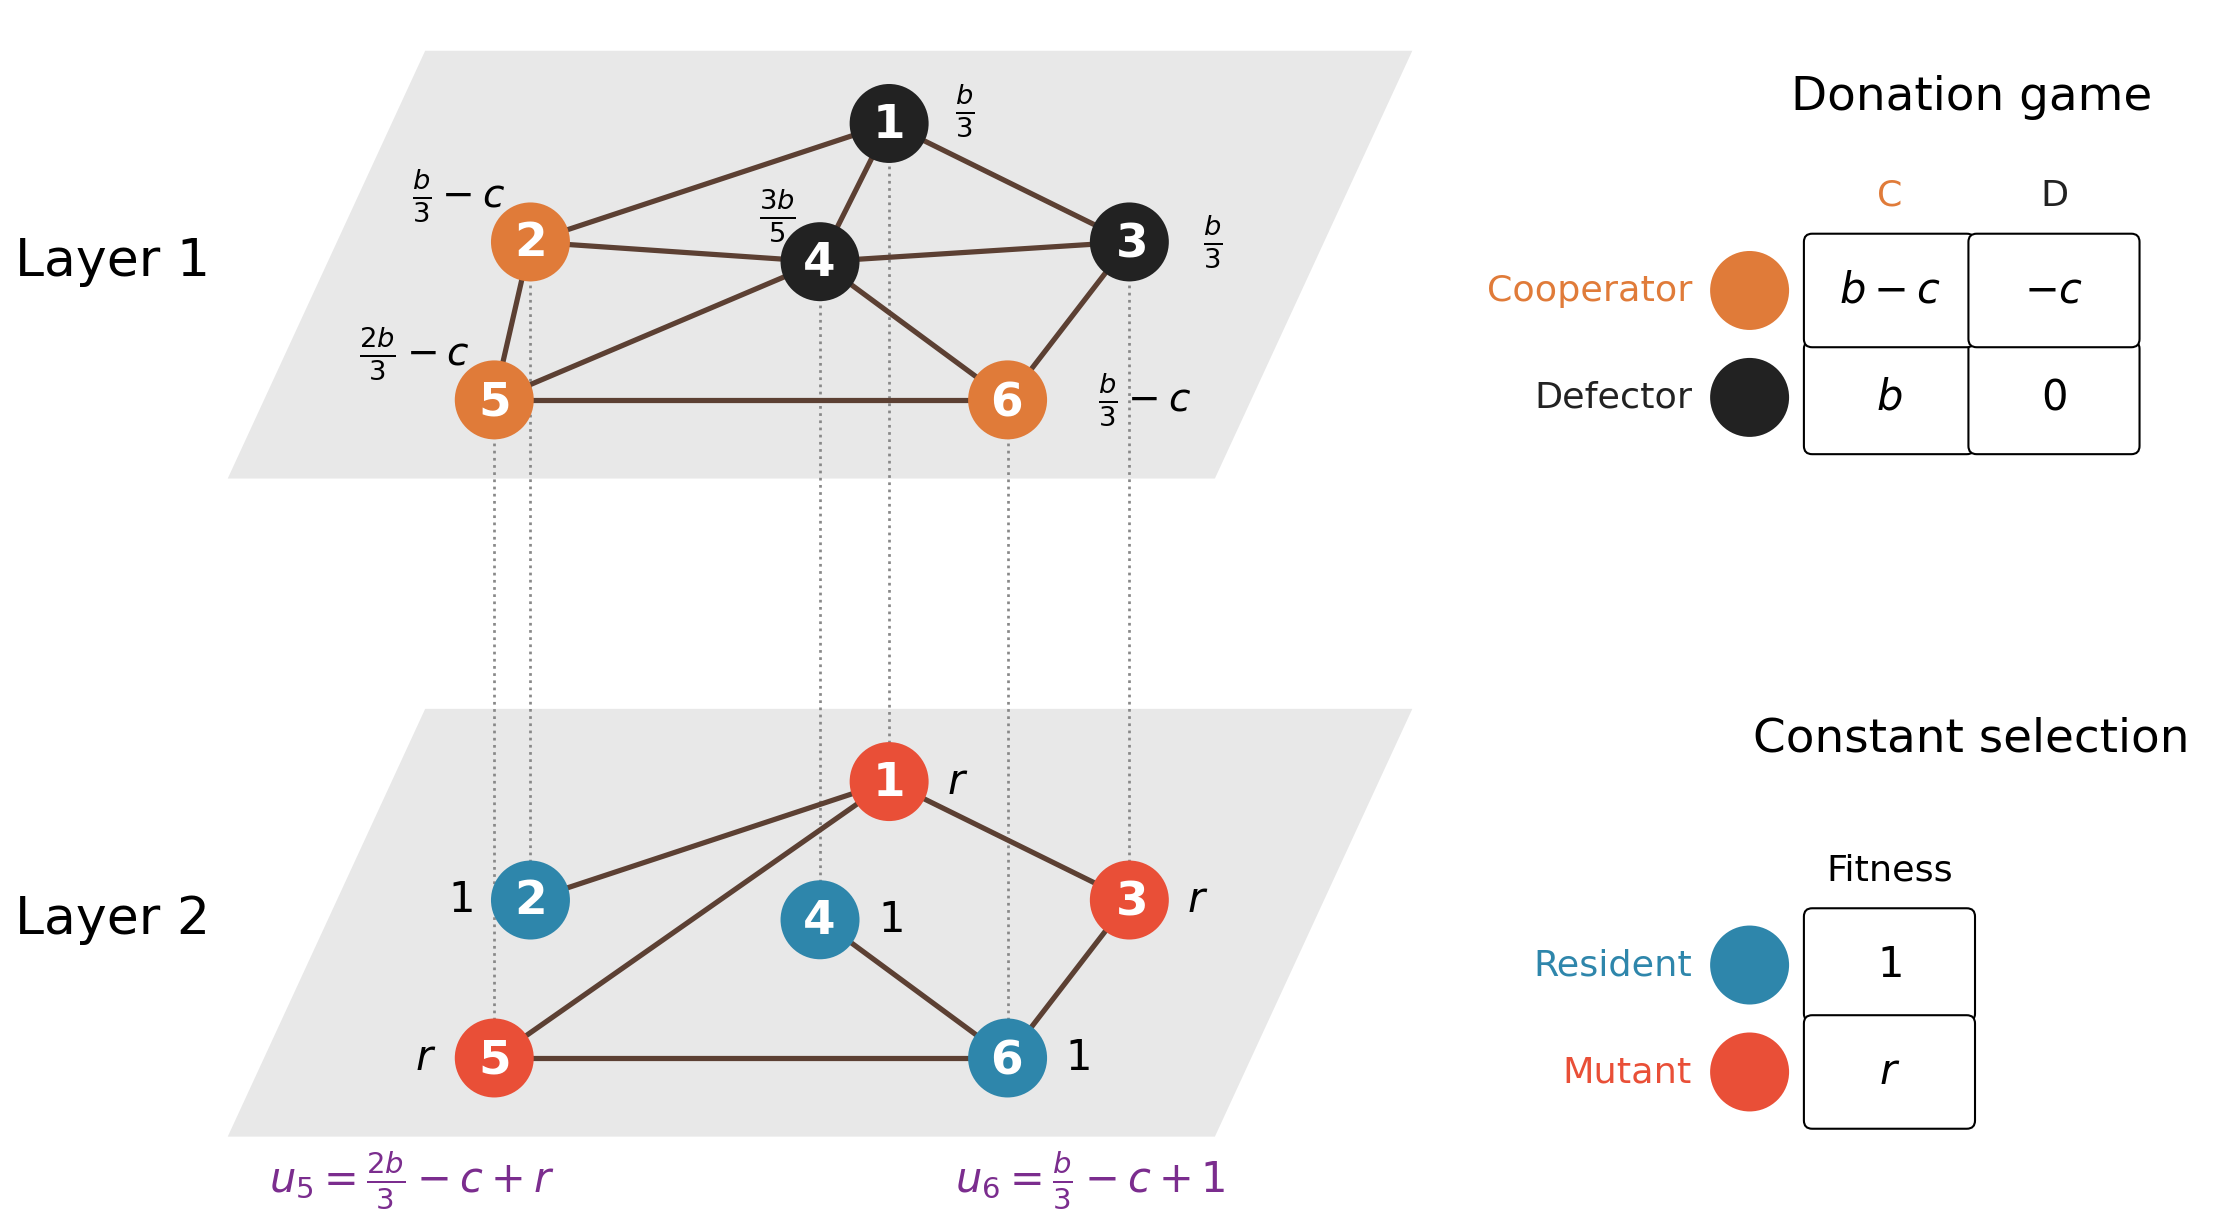

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Polygon
from matplotlib.lines import Line2D
import matplotlib.transforms as mtransforms

# =============================================================================
# Two-layer network schematic for evolutionary games
# =============================================================================


FONT_SCALE = 1.25

def draw_parallelogram(ax, center, width, height, skew=0.3, **kwargs):
    """Draw an isometric parallelogram (layer plane) with parallel left/right sides."""
    cx, cy = center
    hw, hh = width/2, height/2
    pts = np.array([
        [cx - hw, cy - hh],             # bottom-left
        [cx + hw, cy - hh],             # bottom-right
        [cx + hw + skew, cy + hh],      # top-right
        [cx - hw + skew, cy + hh],      # top-left
    ])
    poly = Polygon(pts, **kwargs)
    ax.add_patch(poly)
    return pts

def project_point(x, y, layer_center, skew=0.3, width=5.0, height=2.8):
    """Project a normalized (0-1, 0-1) point onto a layer parallelogram."""
    cx, cy = layer_center
    px = cx + (x - 0.5) * width + skew * (y - 0.5)
    py = cy + (y - 0.5) * height
    return px, py

def draw_node(ax, pos, color, label=None, radius=0.18, fontsize=12, 
              edgecolor='black', linewidth=1.5, textcolor='white',
              label_offset=(0, 0)):
    """
    Draw a circular node with centered label.
    
    Parameters:
    -----------
    label_offset : tuple (dx, dy)
        Manual offset for the label position. Positive dx moves right, positive dy moves up.
        Example: label_offset=(0.02, -0.01) shifts label slightly right and down.
    """
    circle = plt.Circle(pos, radius, facecolor=color, edgecolor=edgecolor, 
                        linewidth=linewidth, zorder=10)
    ax.add_patch(circle)
    if label:
        # Center the label with optional manual offset
        ax.text(pos[0] + label_offset[0], pos[1] + label_offset[1], label, 
                ha='center', va='center', 
                fontsize=fontsize, fontweight='bold', color=textcolor, zorder=11)

def draw_edge(ax, p1, p2, color='#444444', linewidth=2.5, zorder=5):
    """Draw an edge between two nodes."""
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=linewidth, 
            zorder=zorder, solid_capstyle='round')

def draw_dotted_vertical(ax, p1, p2, color='gray', linewidth=1.5, zorder=3):
    """Draw a dotted vertical line connecting replica nodes."""
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=linewidth,
            linestyle=':', zorder=zorder)

def draw_payoff_matrix_text(ax, pos, game_label="Donation game", 
                            entries=None, colors=('orange', 'black'), fontsize=13,
                            node_radius=0.22):
    """Draw a 2x2 payoff matrix with colored C/D column headers, colored circle row headers."""
    if entries is None:
        entries = [[r"$b-c$", r"$-c$"], [r"$b$", r"$0$"]]
    
    x, y = pos
    cell_w, cell_h = 1.0, 0.65
    
    # Column headers - C and D in color (above matrix)
    ax.text(x + cell_w*0.5, y + cell_h + 0.35, "C", fontsize=fontsize, ha='center', va='center', 
            color=colors[0], fontweight='bold')
    ax.text(x + cell_w*1.5, y + cell_h + 0.35, "D", fontsize=fontsize, ha='center', va='center', 
            color=colors[1], fontweight='bold')
    
    # Row headers - colored circles 
    ax.add_patch(plt.Circle((x - 0.35, y + cell_h*0.5), node_radius, facecolor=colors[0], edgecolor='none'))
    ax.add_patch(plt.Circle((x - 0.35, y - cell_h*0.5), node_radius, facecolor=colors[1], edgecolor='none'))
    
    # Matrix cells
    for i in range(2):
        for j in range(2):
            rect = FancyBboxPatch((x + j*cell_w, y - cell_h + i*cell_h), 
                                   cell_w, cell_h, 
                                   boxstyle="round,pad=0.02,rounding_size=0.05",
                                   facecolor='white', edgecolor='black', linewidth=1)
            ax.add_patch(rect)
            # Center text in cell
            ax.text(x + j*cell_w + cell_w/2, y - cell_h + i*cell_h + cell_h/2,
                    entries[1-i][j], ha='center', va='center', fontsize=fontsize+2)


def draw_fitness_table(ax, pos, colors=('blue', 'red'), fontsize=13, node_radius=0.22):
    """Draw a 2x1 fitness table for constant selection with colored circles as row headers."""
    x, y = pos
    cell_w, cell_h = 1.0, 0.65
    
    # Column header - "Fitness" (above table)
    ax.text(x + cell_w/2, y + cell_h + 0.35, "Fitness", fontsize=fontsize, ha='center', va='center', 
            color='black')
    
    # Row headers - colored circles
    ax.add_patch(plt.Circle((x - 0.35, y + cell_h*0.5), node_radius, facecolor=colors[0], edgecolor='none'))
    ax.add_patch(plt.Circle((x - 0.35, y - cell_h*0.5), node_radius, facecolor=colors[1], edgecolor='none'))
    
    # Top cell: resident fitness = 1
    rect1 = FancyBboxPatch((x, y), cell_w, cell_h, 
                           boxstyle="round,pad=0.02,rounding_size=0.05",
                           facecolor='white', edgecolor='black', linewidth=1)
    ax.add_patch(rect1)
    ax.text(x + cell_w/2, y + cell_h/2, r"$1$", ha='center', va='center', fontsize=fontsize+2)
    
    # Bottom cell: mutant fitness = r
    rect2 = FancyBboxPatch((x, y - cell_h), cell_w, cell_h, 
                           boxstyle="round,pad=0.02,rounding_size=0.05",
                           facecolor='white', edgecolor='black', linewidth=1)
    ax.add_patch(rect2)
    ax.text(x + cell_w/2, y - cell_h/2, r"$r$", ha='center', va='center', fontsize=fontsize+2)


def create_multilayer_figure(save_path="multilayer_network_schematic.png", dpi=600):
    fig, ax = plt.subplots(1, 1, figsize=(15, 11), dpi=150)
    ax.set_xlim(-0.5, 12)
    ax.set_ylim(-0.1, 7)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Colors
    BLUE = '#2E86AB'      # Resident (layer 2)
    RED = '#E94F37'       # Mutant (layer 2)
    ORANGE = '#E07B39'    # Cooperator (layer 1)
    BLACK = '#222222'     # Defector (layer 1)
    EDGE_COLOR = '#5C4033'
    LAYER_COLOR = '#E8E8E8'
    TOTAL_PAYOFF_COLOR = '#7B2D8E'  # Purple - unique color for total payoffs
    
    # Layer centers (for parallelogram tiles) 
    layer1_center = (2.9, 5.5+0.182)
    layer2_center = (2.9, 1.5+0.182)
    
    # Node centers - keep at original position
    layer1_node_center = (3.5, 5.5)
    layer2_node_center = (3.5, 1.5)
    
    # Draw layer planes - parallel left/right sides, no border
    para_height = 2.6
    para_skew = 1.2  # Horizontal shift for the skew
    draw_parallelogram(ax, (layer1_center[0], layer1_center[1] - 0.2), 6.0, para_height, skew=para_skew, 
                       facecolor=LAYER_COLOR, edgecolor='none', linewidth=0, zorder=1)
    draw_parallelogram(ax, (layer2_center[0], layer2_center[1] - 0.2), 6.0, para_height, skew=para_skew,
                       facecolor=LAYER_COLOR, edgecolor='none', linewidth=0, zorder=1)
    
    # Layer labels - scaled font, moved further left
    ax.text(-0.8, 5.5, "Layer 1", fontsize=20*FONT_SCALE, ha='center', va='center')
    ax.text(-0.8, 1.5, "Layer 2", fontsize=20*FONT_SCALE, ha='center', va='center')
    
    # Node positions
    node_coords = {
        '1': (0.5, 0.85),
        '2': (0.15, 0.55),
        '3': (0.85, 0.55),
        '4': (0.5, 0.5),
        '5': (0.2, 0.15),
        '6': (0.8, 0.15),
    }
    
    # Layer 1: Cooperator (orange) = 2, 5; Defector (black) = 1, 3, 4, 6
    layer1_types = {'1': 'defector', '2': 'cooperator', '3': 'defector', 
                    '4': 'defector', '5': 'cooperator', '6': 'cooperator'}
    layer1_colors = {node: ORANGE if t == 'cooperator' else BLACK for node, t in layer1_types.items()}
    
    # Layer 2: Mutant (red) = 1, 3, 5; Resident (blue) = 2, 4, 6
    layer2_types = {'1': 'mutant', '2': 'resident', '3': 'mutant', 
                    '4': 'resident', '5': 'mutant', '6': 'resident'}
    layer2_colors = {node: RED if t == 'mutant' else BLUE for node, t in layer2_types.items()}
    
    # Project to layers - using node centers for proper centering
    proj_height = 2.4
    layer1_nodes = {node: project_point(*c, layer1_node_center, skew=para_skew, width=5.2, height=proj_height) for node, c in node_coords.items()}
    layer2_nodes = {node: project_point(*c, layer2_node_center, skew=para_skew, width=5.2, height=proj_height) for node, c in node_coords.items()}
    
    # Layer 1 edges
    edges_l1 = [('1', '2'), ('1', '3'), ('1', '4'), ('2', '4'), ('2', '5'), 
                ('3', '4'), ('3', '6'), ('4', '5'), ('4', '6'), ('5', '6')]
    for e in edges_l1:
        draw_edge(ax, layer1_nodes[e[0]], layer1_nodes[e[1]], color=EDGE_COLOR, linewidth=2.5)
    
    # Layer 2 edges - includes ('1', '5') which is NOT in layer 1
    edges_l2 = [('1', '2'), ('1', '3'),  ('3', '6'), ('5', '6'), ('4', '6'), ('1', '5')]
    for e in edges_l2:
        draw_edge(ax, layer2_nodes[e[0]], layer2_nodes[e[1]], color=EDGE_COLOR, linewidth=2.5)
    
    # Draw dotted lines connecting replica nodes
    for node in node_coords:
        draw_dotted_vertical(ax, layer1_nodes[node], layer2_nodes[node], color='#888888', linewidth=1.3)
    
    # Draw nodes - smaller font, use plain numbers for centering
    node_radius = 0.24
    node_label_fontsize = 18 * FONT_SCALE  # Reduced from 23
    
    # Manual label offsets per node: {node_id: (dx, dy)}
    # Adjust these values to fine-tune label positions
    # Positive dx = move right, Positive dy = move up
    label_offsets = {
        '1': (0, 0-0.01),
        '2': (0, 0-0.01),
        '3': (0.02, -0.02),
        '4': (-0.006, -0.012),
        '5': (0.0, -0.016),
        '6': (-0.01, -0.024),
    }
    
    for node, pos in layer1_nodes.items():
        draw_node(ax, pos, layer1_colors[node], label=node, radius=node_radius, 
                  fontsize=node_label_fontsize, textcolor='white', edgecolor='none', linewidth=0,
                  label_offset=label_offsets[node])
    
    for node, pos in layer2_nodes.items():
        draw_node(ax, pos, layer2_colors[node], label=node, radius=node_radius,
                  fontsize=node_label_fontsize, textcolor='white', edgecolor='none', linewidth=0,
                  label_offset=label_offsets[node])
    
    # Layer 1 payoffs - scaled font
    layer1_payoffs = {
        '1': r"$\frac{b}{3}$",
        '2': r"$\frac{b}{3}-c$",
        '3': r"$\frac{b}{3}$",
        '4': r"$\frac{3b}{5}$",
        '5': r"$\frac{2b}{3}-c$",
        '6': r"$\frac{b}{3}-c$",
    }
    layer1_payoff_offsets = {
        '1': (0.4, 0.08),
        '2': (-0.15, 0.28),
        '3': (0.45, 0.0),
        '4': (-0.15, 0.28),
        '5': (-0.15, 0.28),
        '6': (0.55, 0.0),
    }
    
    for node, payoff in layer1_payoffs.items():
        pos = layer1_nodes[node]
        off = layer1_payoff_offsets[node]
        if off[0] > 0:
            ha = 'left'
        elif off[0] < 0:
            ha = 'right'
        else:
            ha = 'center'
        ax.text(pos[0] + off[0], pos[1] + off[1], payoff, fontsize=15*FONT_SCALE, 
                ha=ha, va='center')
    
    # Layer 2: fitness labels - scaled font
    layer2_fitness = {'1': r'$r$', '2': r'$1$', '3': r'$r$', '4': r'$1$', '5': r'$r$', '6': r'$1$'}
    layer2_fit_offsets = {
        '1': (0.35, 0.0), 
        '2': (-0.35, 0.0),
        '3': (0.35, 0.0), 
        '4': (0.35, 0.0), 
        '5': (-0.35, 0.0),
        '6': (0.35, 0.0)
    }
    
    for node, fitness in layer2_fitness.items():
        pos = layer2_nodes[node]
        off = layer2_fit_offsets[node]
        ha = 'right' if off[0] < 0 else 'left'
        ax.text(pos[0] + off[0], pos[1] + off[1], fitness, fontsize=16*FONT_SCALE, 
                ha=ha, va='center')
    
    # === LAYER 1: Title and Payoff matrix with single legend ===
    # Title ABOVE payoff matrix 
    ax.text(10.5, 6.5, "Donation game", fontsize=18*FONT_SCALE, ha='center', va='center', color='black')
    
    # Payoff matrix position 
    matrix_x = 9.5
    matrix_y = 5
    cell_w, cell_h = 1.0, 0.65
    
    # Column headers - C and D in color (above matrix) - non-bold, same fontsize as Cooperator/Defector
    ax.text(matrix_x + cell_w*0.5, matrix_y + cell_h + 0.25, "C", fontsize=14*FONT_SCALE, ha='center', va='center', 
            color=ORANGE)
    ax.text(matrix_x + cell_w*1.5, matrix_y + cell_h + 0.25, "D", fontsize=14*FONT_SCALE, ha='center', va='center', 
            color=BLACK)
    
    # Row headers - colored circles with text labels 
    ax.add_patch(plt.Circle((matrix_x - 0.35, matrix_y + cell_h*0.5), node_radius, facecolor=ORANGE, edgecolor='none'))
    ax.text(matrix_x - 0.7, matrix_y + cell_h*0.5, "Cooperator", fontsize=14*FONT_SCALE, ha='right', va='center', color=ORANGE)
    
    ax.add_patch(plt.Circle((matrix_x - 0.35, matrix_y - cell_h*0.5), node_radius, facecolor=BLACK, edgecolor='none'))
    ax.text(matrix_x - 0.7, matrix_y - cell_h*0.5, "Defector", fontsize=14*FONT_SCALE, ha='right', va='center', color=BLACK)
    
    # Matrix entries
    matrix_entries = [[r"$b-c$", r"$-c$"], [r"$b$", r"$0$"]]
    for i in range(2):
        for j in range(2):
            rect = FancyBboxPatch((matrix_x + j*cell_w, matrix_y - cell_h + i*cell_h), 
                                   cell_w, cell_h, 
                                   boxstyle="round,pad=0.02,rounding_size=0.05",
                                   facecolor='white', edgecolor='black', linewidth=1)
            ax.add_patch(rect)
            ax.text(matrix_x + j*cell_w + cell_w/2, matrix_y - cell_h + i*cell_h + cell_h/2,
                    matrix_entries[1-i][j], ha='center', va='center', fontsize=16*FONT_SCALE)
    
    # === LAYER 2: Title and fitness table with single legend ===
    # Title ABOVE fitness table 
    ax.text(10.5, 2.6, "Constant selection", fontsize=18*FONT_SCALE, ha='center', va='center', color='black')
    
    # Fitness table position - moved right and lowered
    table_x = 9.5
    table_y = 0.9
    
    # Column header - "Fitness" (above table) - slightly lowered from 0.35 to 0.25
    ax.text(table_x + cell_w/2, table_y + cell_h + 0.25, "Fitness", fontsize=14*FONT_SCALE, ha='center', va='center', 
            color='black')
    
    # Row headers - colored circles with text labels (single legend, closer to table)
    ax.add_patch(plt.Circle((table_x - 0.35, table_y + cell_h*0.5), node_radius, facecolor=BLUE, edgecolor='none'))
    ax.text(table_x - 0.7, table_y + cell_h*0.5, "Resident", fontsize=14*FONT_SCALE, ha='right', va='center', color=BLUE)
    
    ax.add_patch(plt.Circle((table_x - 0.35, table_y - cell_h*0.5), node_radius, facecolor=RED, edgecolor='none'))
    ax.text(table_x - 0.7, table_y - cell_h*0.5, "Mutant", fontsize=14*FONT_SCALE, ha='right', va='center', color=RED)
    
    # Top cell: resident fitness = 1
    rect1 = FancyBboxPatch((table_x, table_y), cell_w, cell_h, 
                           boxstyle="round,pad=0.02,rounding_size=0.05",
                           facecolor='white', edgecolor='black', linewidth=1)
    ax.add_patch(rect1)
    ax.text(table_x + cell_w/2, table_y + cell_h/2, r"$1$", ha='center', va='center', fontsize=16*FONT_SCALE)
    
    # Bottom cell: mutant fitness = r
    rect2 = FancyBboxPatch((table_x, table_y - cell_h), cell_w, cell_h, 
                           boxstyle="round,pad=0.02,rounding_size=0.05",
                           facecolor='white', edgecolor='black', linewidth=1)
    ax.add_patch(rect2)
    ax.text(table_x + cell_w/2, table_y - cell_h/2, r"$r$", ha='center', va='center', fontsize=16*FONT_SCALE)
    
    # === Total payoffs for nodes 5 and 6 near their layer 2 positions ===
    pos5 = layer2_nodes['5']
    pos6 = layer2_nodes['6']
    
    # Position near the nodes in layer 2, scaled font
    ax.text(pos5[0] - 0.5, pos5[1] - 0.55, r"$u_5 = \frac{2b}{3} - c + r$", fontsize=16*FONT_SCALE, 
            ha='center', va='top', color=TOTAL_PAYOFF_COLOR)
    ax.text(pos6[0] + 0.5, pos6[1] - 0.55, r"$u_6 = \frac{b}{3} - c + 1$", fontsize=16*FONT_SCALE, 
            ha='center', va='top', color=TOTAL_PAYOFF_COLOR)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', pad_inches=0, facecolor='white')
        print(f"Saved: {save_path}")
    
    plt.show()
    return fig, ax


if __name__ == "__main__":
    create_multilayer_figure(save_path="cooperation_benefit_schematic.png", dpi=600)
